<a href="https://colab.research.google.com/github/poojayadao12/Capstone_Project_Global-Terrorism-Dataset/blob/main/Data_Visualization_Of_Global_Terrorism_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GLOBAL TERRORISM ANALYSIS DATA VISUALIZATION**

Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mat
pd.options.mode.chained_assignment = None
import plotly.express as px
import seaborn as sns
from scipy.stats import mode
import csv
import ast
%matplotlib inline


Connecting colab to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing data from google drive

In [ ]:
file_path = '/content/drive/MyDrive/GlobalTerrorism.csv'
df=pd.read_csv(file_path, encoding='ISO-8859-1' )

<ipython-input-3-2b88956fc12c>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path, encoding='ISO-8859-1' )


Initial layout of the data

In [ ]:
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [ ]:
# filltering out of the columns we need
df = df[['eventid','iyear','imonth','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','natlty1_txt','nkill','claimed','weaptype1_txt','weapdetail','nwound','nkillter','gname','ishostkid','propextent_txt','provstate','ransom']].copy()


In [ ]:
# filltering out of the columns we need and renaming
df.rename(columns = 
                  {'eventid':'id','iyear':'year', 
                   'imonth':'month',
                   'iday':'day',
                   'country_txt' : 'Country',
                   'region_txt' : 'region',
                   'crit1' : 'crit',
                   'attacktype1_txt' : 'attacktype',
                   'targtype1_txt' : 'targettype',
                   'natlty1_txt' : 'nationalityofvic',
                   'gname' : 'organisation',
                   'claimed' : 'claimedresp',
                   'weaptype1_txt' : 'weapontype',
                   'nkill' : 'nkilled',
                   'nkillter' : 'nkillonlyter',
                   'nwound' : 'nwounded',
                   'propextent_txt' : 'propdamageextent',
                   'ishostkid' : 'victimkidnapped',
                   'ransom' : 'ransomdemanded',
                   'provstate' : 'state'
                   }, inplace = True)
     

In [ ]:
# now dataset looks
df.head(10)

,id,year,month,Country,region,city,attacktype,targettype,nationalityofvic,nkilled,claimedresp,weapontype,weapdetail,nwounded,nkillonlyter,organisation,victimkidnapped,propdamageextent,state,ransomdemanded
0,197000000001,1970,7,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Dominican Republic,1.0,NaN,Unknown,NaN,0.0,NaN,MANO-D,0.0,NaN,NaN,0.0
1,197000000002,1970,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,0.0,NaN,Unknown,NaN,0.0,NaN,23rd of September Communist League,1.0,NaN,Federal,1.0
2,197001000001,1970,1,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,United States,1.0,NaN,Unknown,NaN,0.0,NaN,Unknown,0.0,NaN,Tarlac,0.0
3,197001000002,1970,1,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),United States,NaN,NaN,Explosives,Explosive,NaN,NaN,Unknown,0.0,NaN,Attica,0.0
4,197001000003,1970,1,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),United States,NaN,NaN,Incendiary,Incendiary,NaN,NaN,Unknown,0.0,NaN,Fukouka,0.0
5,197001010002,1970,1,United States,North America,Cairo,Armed Assault,Police,United States,0.0,0.0,Firearms,Several gunshots were fired.,0.0,0.0,Black Nationalists,0.0,Minor (likely < $1 million),Illinois,0.0
6,197001020001,1970,1,Uruguay,South America,Montevideo,Assassination,Police,Uruguay,0.0,NaN,Firearms,Automatic firearm,0.0,NaN,Tupamaros (Uruguay),0.0,NaN,Montevideo,0.0
7,197001020002,1970,1,United States,North America,Oakland,Bombing/Explosion,Utilities,United States,0.0,0.0,Explosives,NaN,0.0,0.0,Unknown,0.0,Minor (likely < $1 million),California,0.0
8,197001020003,1970,1,United States,North America,Madison,Facility/Infrastructure Attack,Military,United States,0.0,1.0,Incendiary,Firebomb consisting of gasoline,0.0,0.0,New Year's Gang,0.0,Minor (likely < $1 million),Wisconsin,0.0
9,197001030001,1970,1,United States,North America,Madison,Facility/Infrastructure Attack,Government (General),United States,0.0,0.0,Incendiary,Poured gasoline on the floor and lit it with a...,0.0,0.0,New Year's Gang,0.0,Minor (likely < $1 million),Wisconsin,0.0


In [ ]:
#Add column ncasualties (Number of Dead/Injured people) by adding Nkill and Nwound
df['ncasualties'] = df['nkilled'] + df['nwounded']

In [ ]:
# Limit long strings
df['weapontype'] = df['weapontype'].replace(u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')


df['propdamageextent'] = df['propdamageextent'].replace('Minor (likely < $1 million)', 'Minor')
df['propdamageextent'] = df['propdamageextent'].replace('Major (likely > 1 billion)', 'Major')
df['propdamageextent'] = df['propdamageextent'].replace('Catastrophic (likely > $1 billion)', 'Catastrophic')
     

In [ ]:
df.columns

Index(['id', 'year', 'month', 'Country', 'region', 'city', 'attacktype',
       'targettype', 'nationalityofvic', 'nkilled', 'claimedresp',
       'weapontype', 'weapdetail', 'nwounded', 'nkillonlyter', 'organisation',
       'victimkidnapped', 'propdamageextent', 'state', 'ransomdemanded',
       'ncasualties'],
      dtype='object')

Data visualization

#1  **Analysis of the number of attacks per year**

In [ ]:
# checking if there are any null values
df['year'].isna().sum()

0

Text(0.5, 1.0, 'Number of Terrorist Attack by Year')

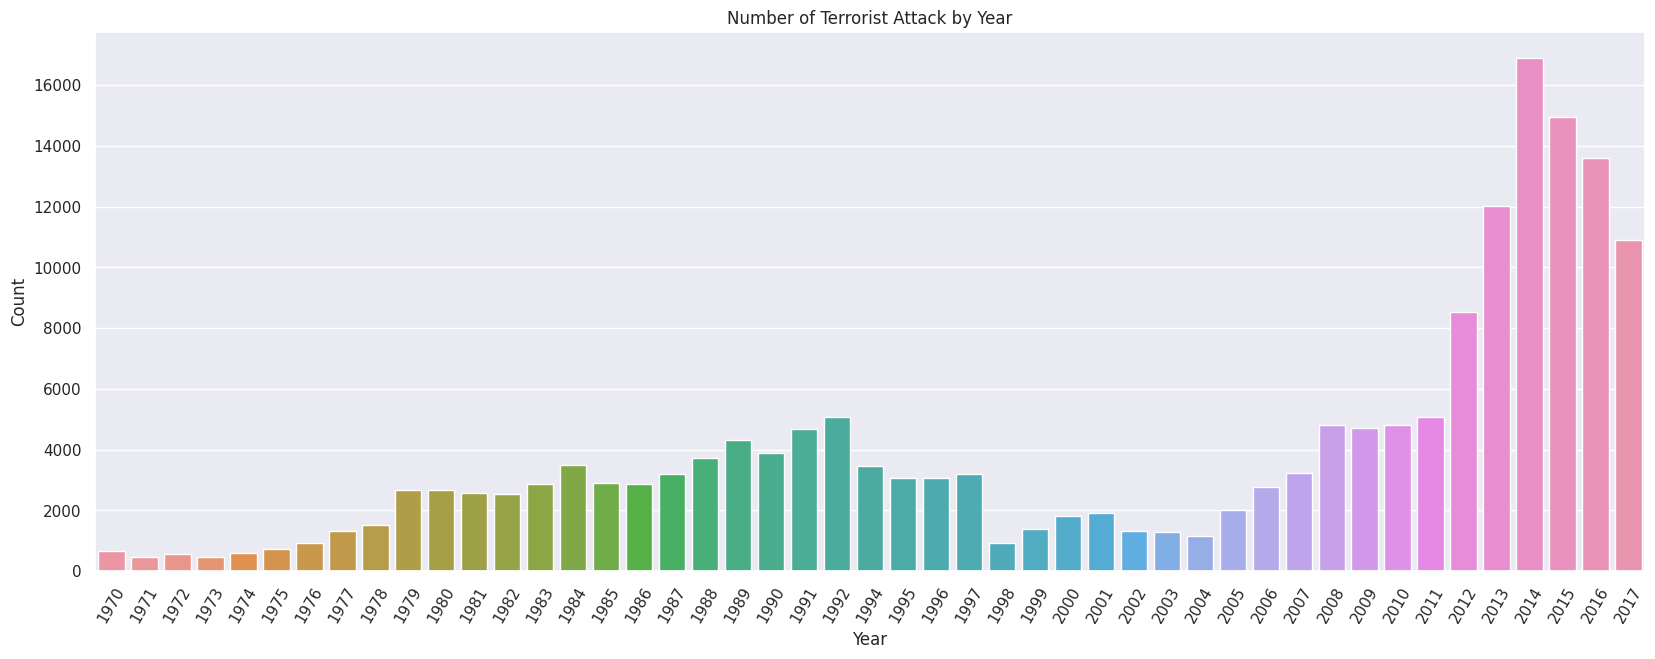

In [ ]:
f = plt.figure(figsize=(20, 7))

sns.set(font_scale = 1.1)
sns.set_theme(style = "darkgrid")
xaxis = sns.countplot(x = 'year', data = df)
xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Terrorist Attack by Year', fontsize = 12)

**Conclusion : 2014 has been the year with most number of attacks**

**The top five years with the most number of terrorist attacks.**

In [ ]:
# grouping by attacks
attacks_per_year=df.groupby('year').agg({'year':'count'}).rename(columns={'year':'no_of_attacks'})
attacks_per_year.nlargest(5,'no_of_attacks')

,no_of_attacks
year,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900


## 2 **Number of Attacks per Attack Method**

Text(0.5, 1.0, 'Types of Terrorist Attack ')

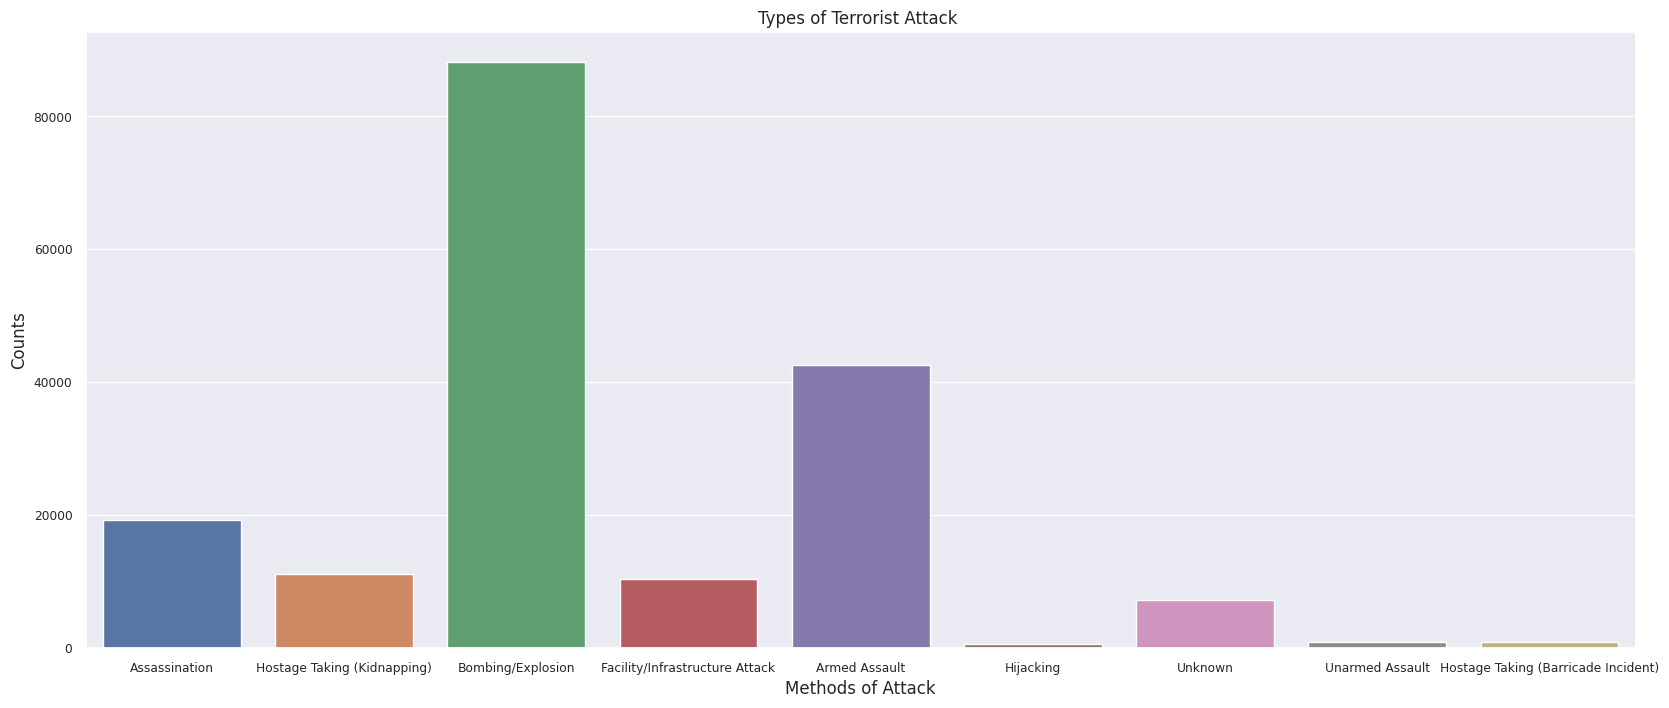

In [ ]:
f = plt.figure(figsize=(20, 8))

sns.set(font_scale=0.8)
sns.countplot(x='attacktype', data=df,)
plt.xlabel('Methods of Attack', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Types of Terrorist Attack ', fontsize=12)

**Conclusion:- Terrorist Groups are more likely to attack by Bombing/Explosion**

**3. Countrywise Attacks from Year 1970-2017**

In [ ]:
# Checking for the top 10 countries with the most number of attacks
country_df=df[['Country','nkilled','organisation']].copy()
country_wise=country_df.groupby('Country').agg({'Country':'count'}).rename(columns={'Country':'total_attacks'}).nlargest(10,'total_attacks').reset_index().sort_values('total_attacks',ascending=False)


In [ ]:
country_wise

,Country,total_attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


Text(0, 0.5, 'Country')

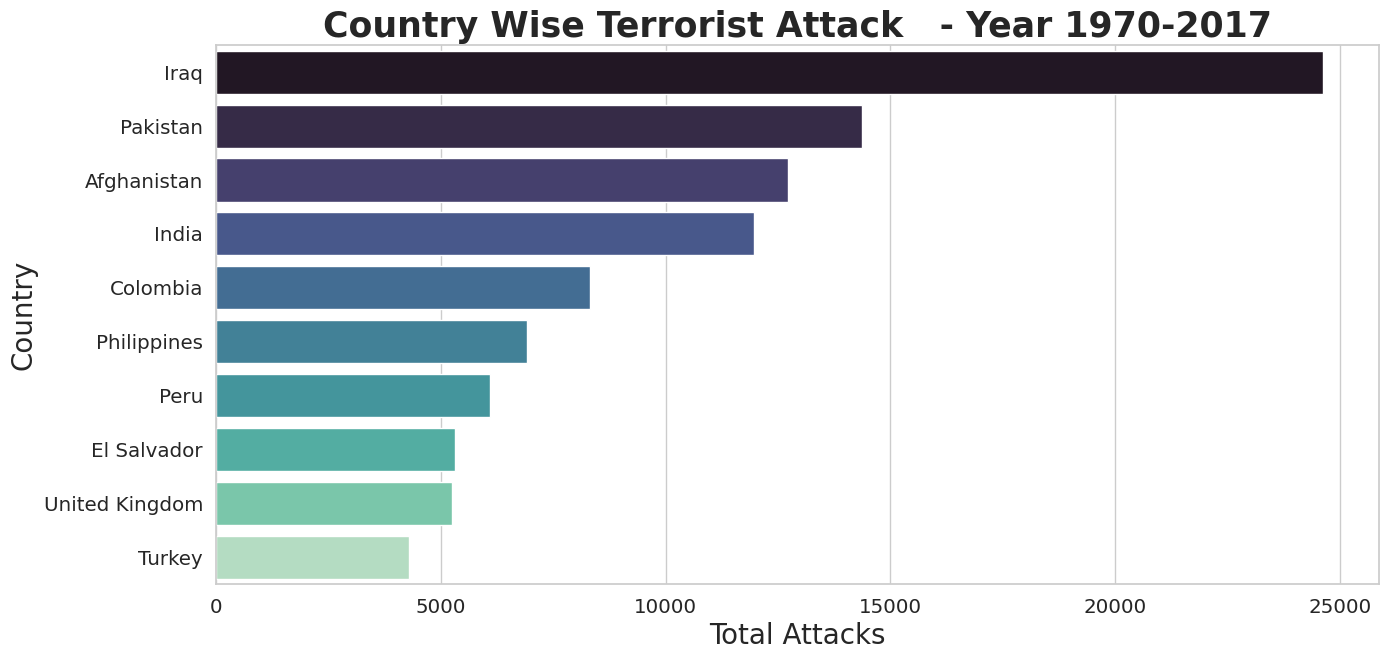

In [ ]:
# Plotting it on the bar graph
plt.rcParams['figure.figsize']=(15,7)
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
l=sns.barplot(x='total_attacks',y='Country',data=country_wise,palette='mako')
l.set_title("Country Wise Terrorist Attack   - Year 1970-2017",fontsize=25,fontweight='bold')
l.set_xlabel('Total Attacks',fontsize=20)
l.set_ylabel('Country',fontsize=20)


**Conclusion: Iraq is the country that has had the most number of attacks in the world between the years 1970 and 2017.**

**4 Number of Attacks per Type of Targets**

Text(0.5, 1.0, 'Types of Target')

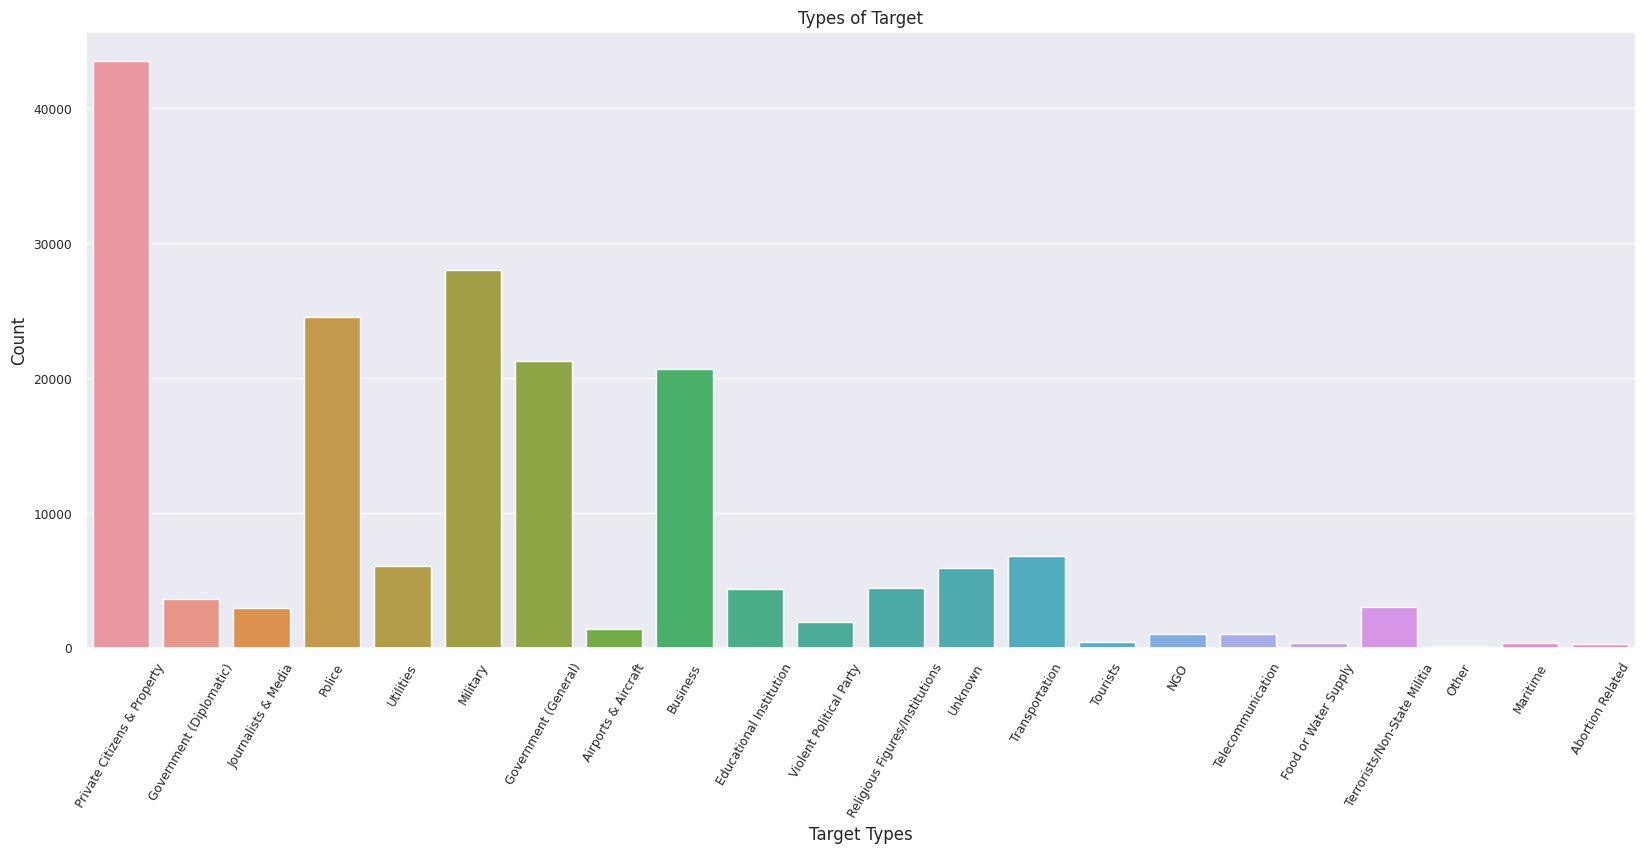

In [ ]:
f = plt.figure(figsize=(20, 8))

sns.set(font_scale=0.8)
xaxis = sns.countplot(x='targettype', data=df,)

xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.xlabel('Target Types', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Types of Target', fontsize=12)

**Conclusion:- Terrorist Groups are more likely to attack on the Big Private properties like Malls or on Citizens.**

**5 Analysis of number of attacks in a region on a particular calender year This helps us compare the rise / fall of attacks on a region**

In [ ]:
region_year = pd.crosstab(df.year,df.region)

region_year.head(20)

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


Text(0.5, 1.0, 'Number of Attacks per Region by Year')

<Figure size 1600x1000 with 0 Axes>

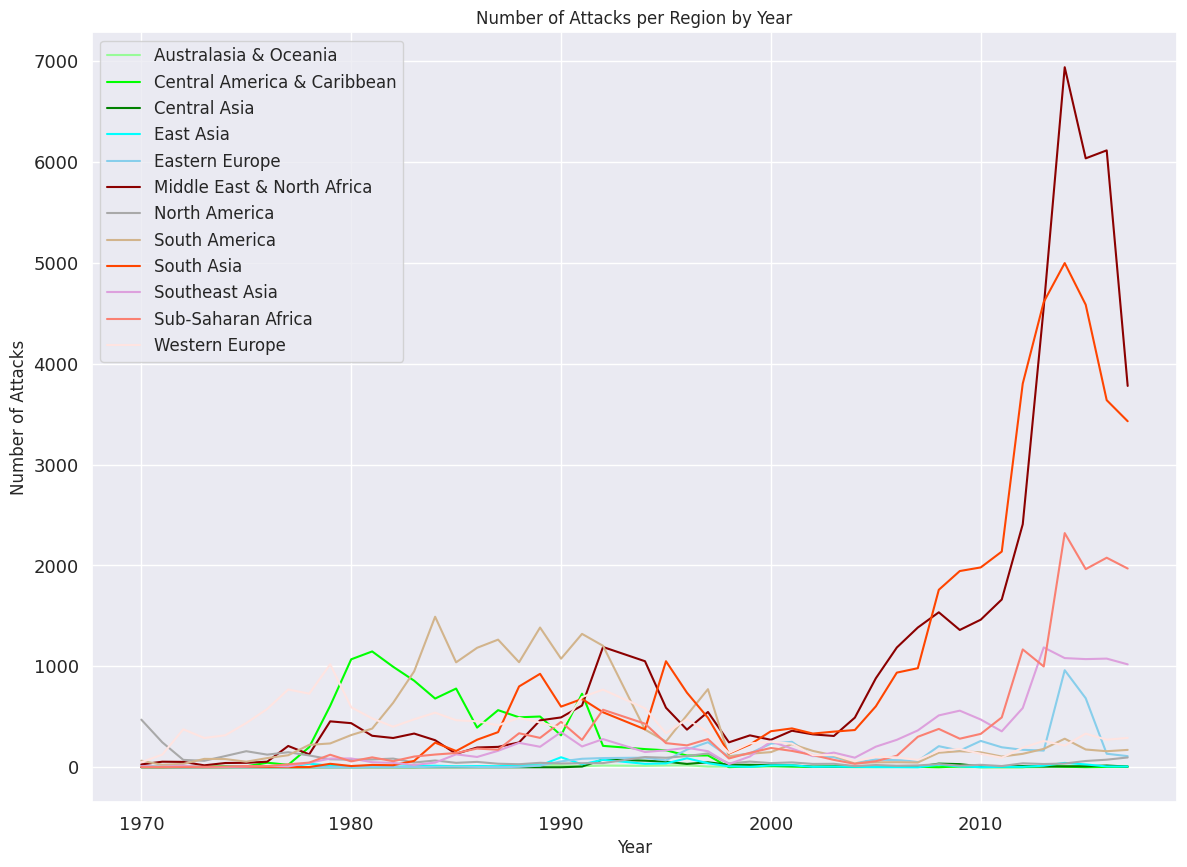

In [ ]:
fig = plt.figure(figsize=(16, 10))

color_list_reg_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 
                    'orangered', 'plum', 'salmon', 'mistyrose']
region_year.plot(figsize=(14, 10), fontsize=13, color=color_list_reg_yr)
#region_year.plot(figsize=(14, 10), fontsize=13)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.legend(fontsize=12)
plt.title('Number of Attacks per Region by Year', fontsize=12)
     

Conclusion:- Terrorist Groups are most attacked Middle East and North Africa Region from 2010 to 2017

**6 Analysis of number of attacks of a particular type on a particular calender year This helps us compare the rise / fall of attack types over the years**

In [ ]:
attacktype_year = pd.crosstab(df.year, df.attacktype)

attacktype_year.head(20)

attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
year,,,,,,,,,
1970,61,22,333,174,11,3,38,3,6
1971,44,70,239,88,6,1,20,0,3
1972,63,265,188,19,12,4,16,0,1
1973,62,164,149,36,8,7,43,3,1
1974,46,158,285,42,3,5,37,4,1
1975,81,181,370,64,1,13,27,0,3
1976,124,204,419,113,4,6,45,3,5
1977,255,146,635,182,7,13,67,0,14
1978,241,263,644,181,0,43,97,5,52


Text(0.5, 1.0, 'number of attacks of a particular type')

<Figure size 2000x1000 with 0 Axes>

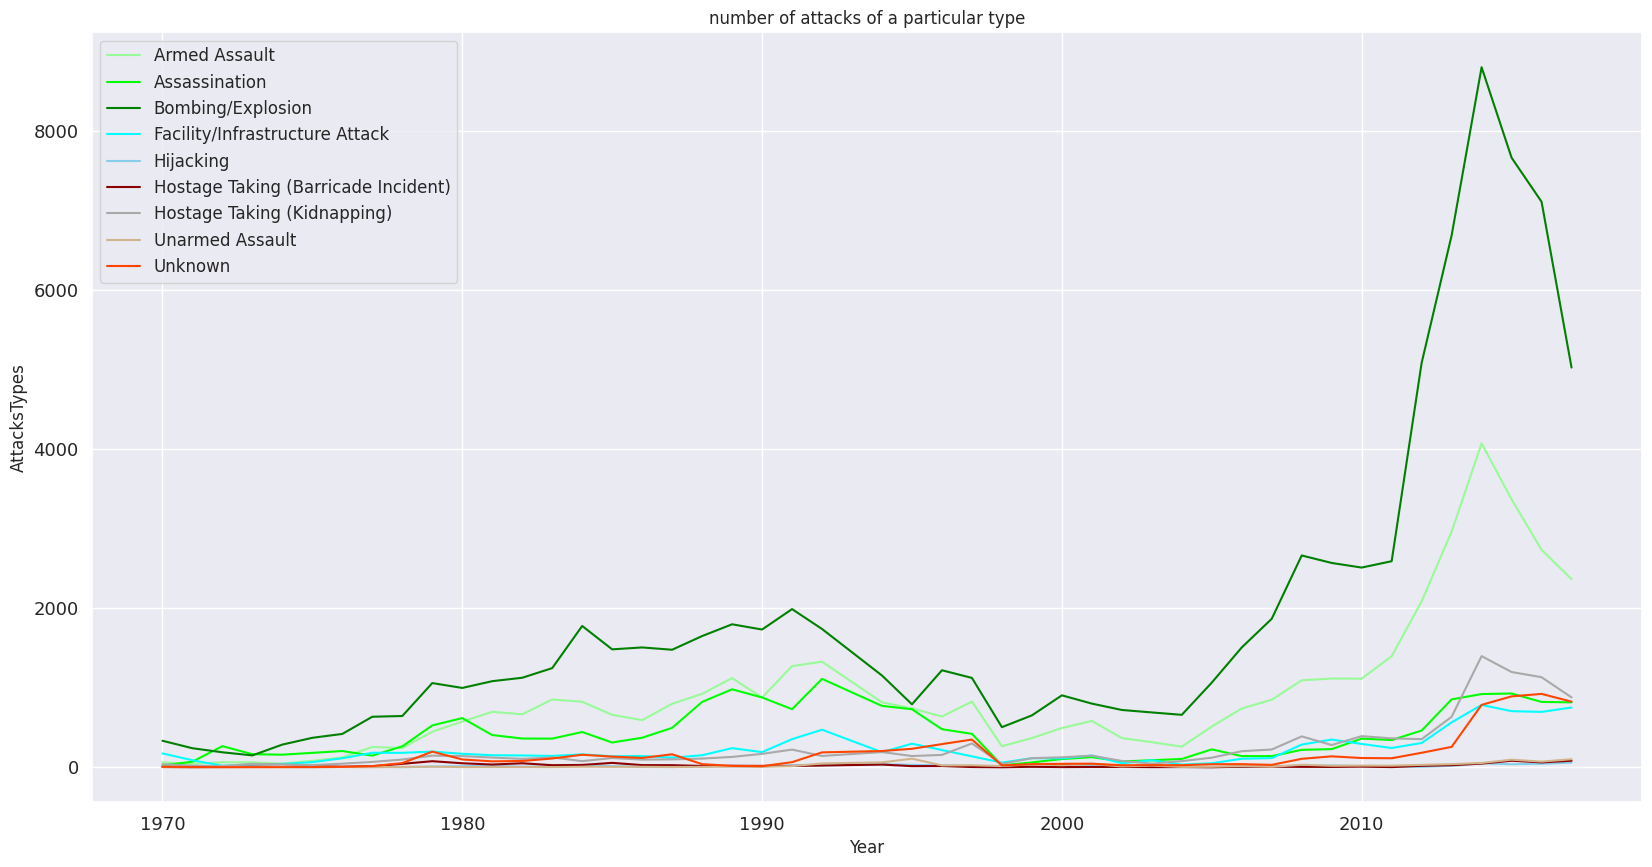

In [ ]:
fig = plt.figure(figsize=(20, 10))

color_list_attcktype_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 
                    'orangered', 'plum', 'salmon', 'mistyrose']
attacktype_year.plot(figsize=(20, 10), fontsize=13, color=color_list_reg_yr)
#region_year.plot(figsize=(14, 10), fontsize=13)
plt.xlabel('Year', fontsize=12)
plt.ylabel('AttacksTypes', fontsize=12)
plt.legend(fontsize=12)
plt.title('number of attacks of a particular type', fontsize=12)

**Conclusion:- Terrorist Groups attack most between 2010 to 2017 by Bombling/explosion**

**7.Percentage of damage done in the world by different attacks.**

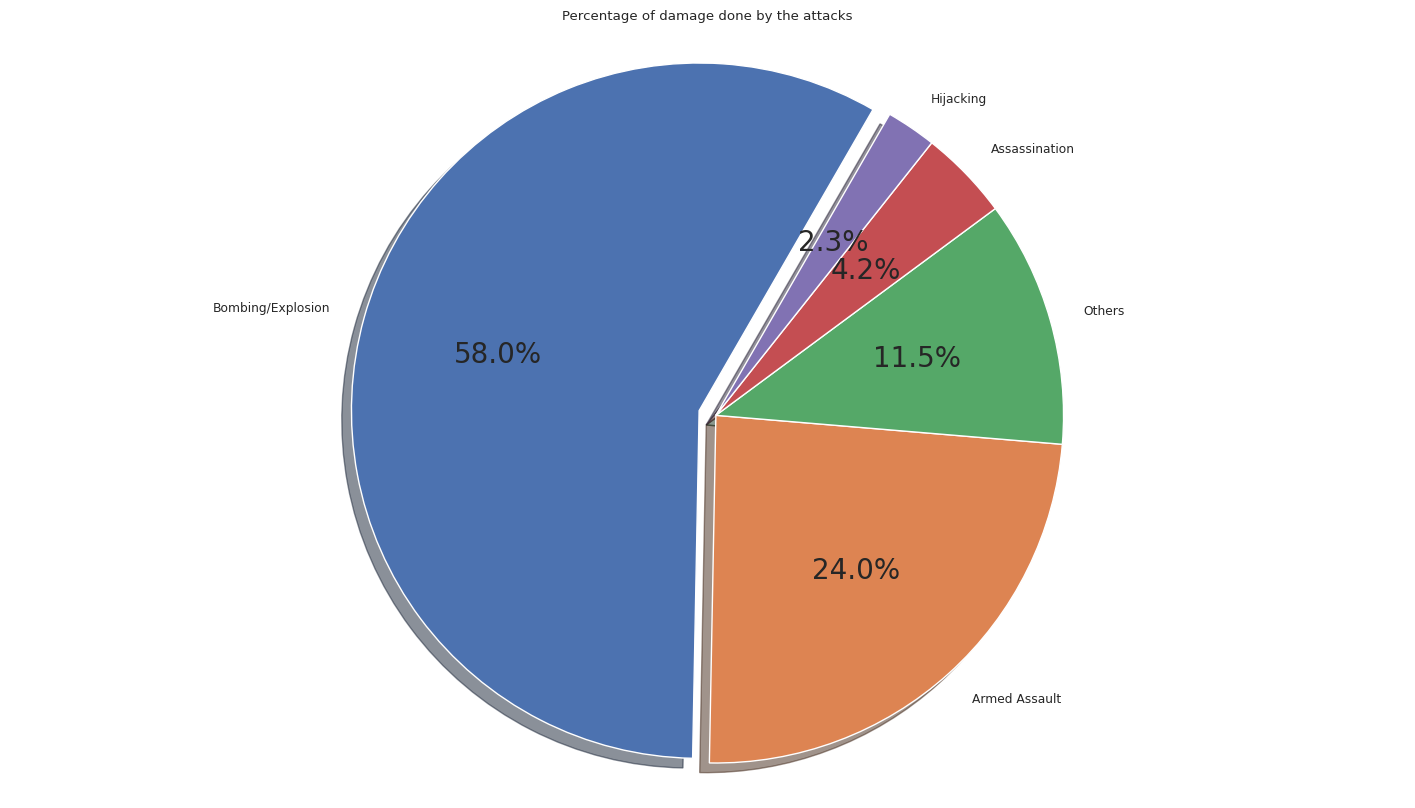

In [ ]:
#Add column ncasualties (Number of Dead/Injured people) by adding Nkill and Nwound
df['ncasualties'] = df['nkilled'] + df['nwounded']
damage_done = df.groupby('attacktype').agg({'ncasualties':'sum'}).sort_values('ncasualties',ascending=False)
damage_done.reset_index(inplace = True)
damage_done.loc[2,'ncasualties'] = damage_done.loc[2,'ncasualties'] + damage_done.loc[4,'ncasualties'] + damage_done.loc[5,'ncasualties'] + damage_done.loc[6,'ncasualties'] + damage_done.loc[8,'ncasualties']
damage_done = damage_done.nlargest(5,'ncasualties')
my_labels = ["Bombing/Explosion",	"Armed Assault",	"Others",	"Assassination","Hijacking"]
plt.rcParams['figure.figsize']=(18,10)
explode=[0.05,0,0,0,0]
mat.rcParams['font.size'] = 20.0
plt.pie(damage_done['ncasualties'],labels=my_labels,explode= explode, shadow=True, startangle= 60, autopct='%1.1f%%')
plt.title('Percentage of damage done by the attacks')
plt.axis('equal')
plt.show()

**Conclusion:- Armed Assault and Bombing has done the maximum damage in terms of deaths in the World from 1970 to 2017**

**8.Type of attacks executed by the Terrorist Groups and their percentage in the world from 1970 to 2017:**

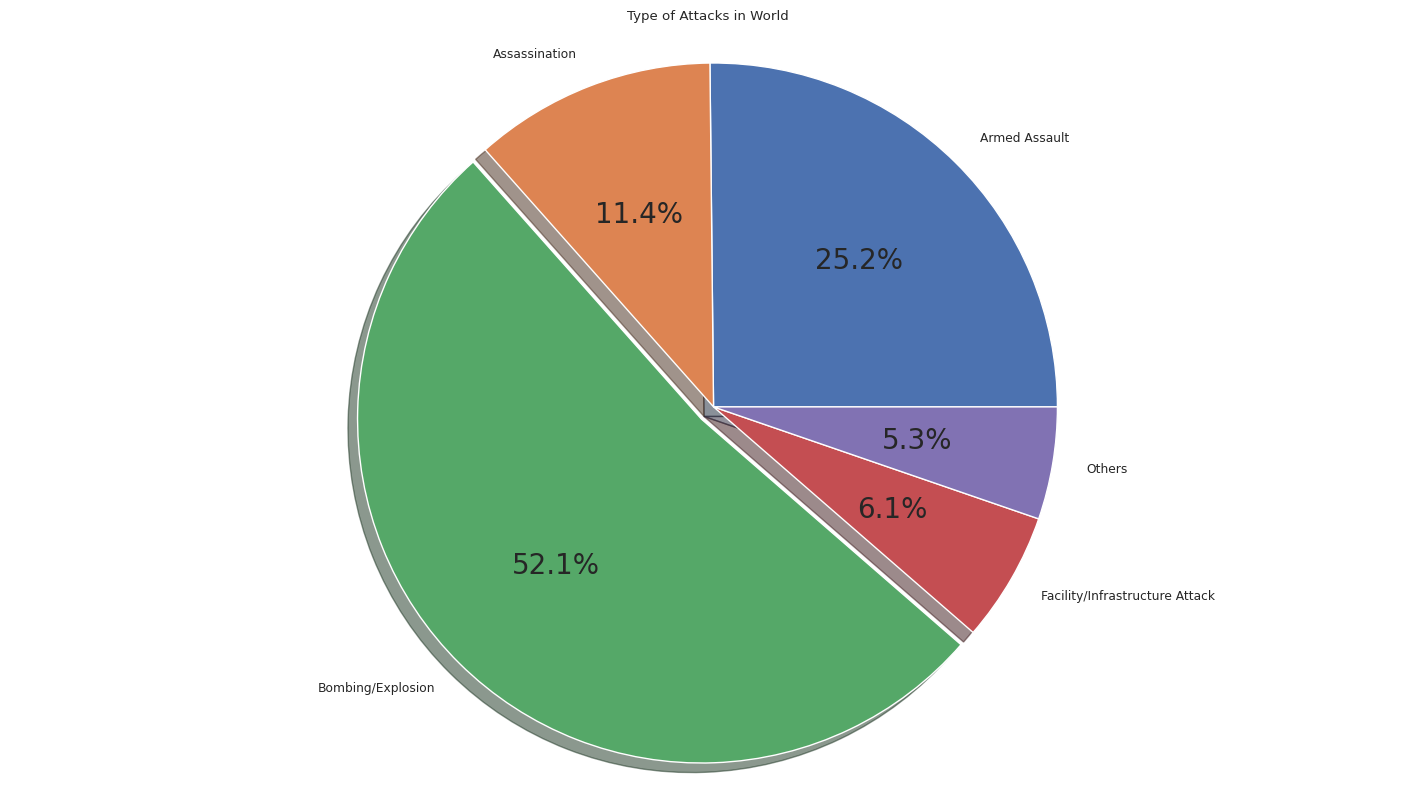

In [ ]:
df["attacktype"] =df['attacktype'].apply(lambda x: x if x in ['Assassination', 'Hostage Taking (Kidnapping)','Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking','Unarmed Assault', 'Hostage Taking (Barricade Incident)'] else 'Others')
g = df.groupby("attacktype").size().reset_index(name="count")
hostage_count = g.loc[5,"count"] + g.loc[6,"count"]
g.loc[7,"count"] = g.loc[7,"count"] + g.loc[4,"count"] + g.loc[8,"count"]
g = g.drop([4,5,6,8])
g.reset_index(inplace = True)
my_labels = ["Armed Assault",	"Assassination",	"Bombing/Explosion",	"Facility/Infrastructure Attack","Others"]
explode=[0,0,0.05,0,0]
plt.rcParams['figure.figsize']=(18,10)
mat.rcParams['font.size'] = 20.0
plt.pie(g["count"],labels=my_labels,explode= explode, shadow=True, autopct='%1.1f%%')
plt.title('Type of Attacks in World')
plt.axis('equal')
plt.show()

**Conclusion :- Bombing & Explosions are the most dangerous type of attack used by the Terrorist Groups to do damage in the countries around the World**

**9. Most active terrorist group in a decade.**

---



In [ ]:
t_group_1=df[['year','organisation']].copy()
t_group=t_group_1[t_group_1.organisation!='Unknown'].copy()
t_group.year= pd.to_datetime(t_group.year,format='%Y').astype('datetime64[Y]')

In [ ]:
t_group=t_group.resample('10A',on='year')['organisation'].apply(lambda x: x.mode().loc[0]).reset_index()

In [ ]:
t_group=t_group.loc[1:,:].copy()

In [ ]:
t_group.loc[1,'year']='1971-1980'
t_group.loc[2,'year']='1981-1990'
t_group.loc[3,'year']='1991-2000'
t_group.loc[4,'year']='2001-2010'
t_group.loc[5,'year']='2011-2017'

In [ ]:
t1_group_= df[['year','organisation']].copy()
t1_group=t1_group_[t1_group_.organisation!='Unknown'].copy()
x=t1_group.groupby('year').agg({'organisation':'value_counts'})
z=x.rename(columns={'organisation':'no_of_attack'}).reset_index()
z.head(3)

,year,organisation,no_of_attack
0,1970,Left-Wing Militants,108
1,1970,Black Nationalists,69
2,1970,Student Radicals,54


In [ ]:
s1=z[(z.year>1970) &(z.year<1981)]
s1.groupby('organisation').agg({'no_of_attack':'sum'}).nlargest(1,'no_of_attack')
s2=z[(z.year>1980) &(z.year<1991)]
s2.groupby('organisation').agg({'no_of_attack':'sum'}).nlargest(1,'no_of_attack')
s3=z[(z.year>1990) &(z.year<2001)]
s3.groupby('organisation').agg({'no_of_attack':'sum'}).nlargest(1,'no_of_attack')
s4=z[(z.year>2000) &(z.year<2011)]
s4.groupby('organisation').agg({'no_of_attack':'sum'}).nlargest(1,'no_of_attack')
s5=z[(z.year>2011) &(z.year<2018)]
s5.groupby('organisation').agg({'no_of_attack':'sum'}).nlargest(1,'no_of_attack')
list_=[1112,3592,884,1442,5818]

In [ ]:
t_group['no_of_attacks']=list_

In [ ]:
t_group

,year,organisation,no_of_attacks
1,1971-1980,Irish Republican Army (IRA),1112
2,1981-1990,Shining Path (SL),3592
3,1991-2000,Shining Path (SL),884
4,2001-2010,Taliban,1442
5,2011-2017,Taliban,5818


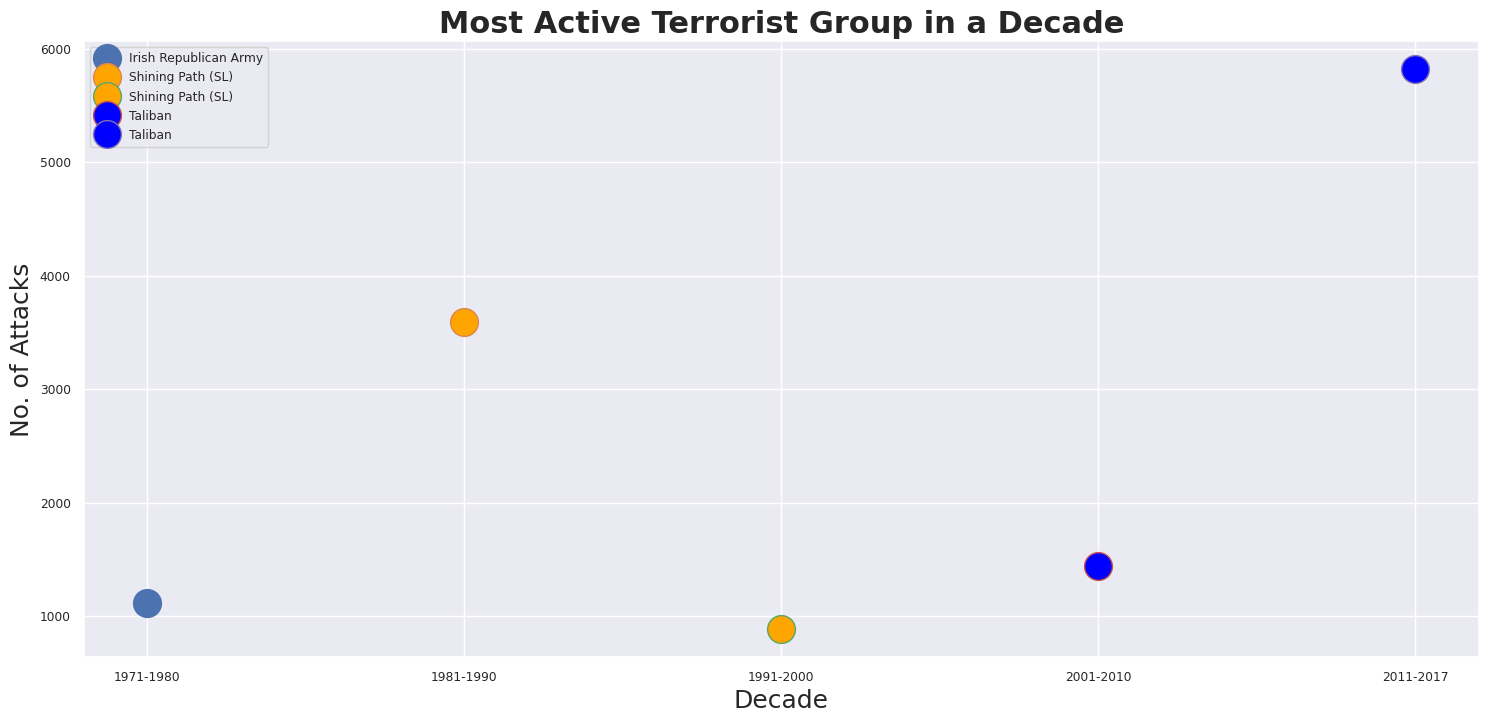

In [ ]:
plt.rcParams["figure.figsize"] = (18,8)
plt.plot(t_group.loc[1,"year"], t_group.loc[1,"no_of_attacks"], marker = 'o', label = "Irish Republican Army",markersize=20)
plt.plot(t_group.loc[2,"year"], t_group.loc[2,"no_of_attacks"], marker = 'o', label = "Shining Path (SL)",markersize=20,markerfacecolor='orange')
plt.plot(t_group.loc[3,"year"], t_group.loc[3,"no_of_attacks"], marker = 'o', label = "Shining Path (SL)",markersize=20,markerfacecolor='orange')
plt.plot(t_group.loc[4,"year"], t_group.loc[4,"no_of_attacks"], marker = 'o', label = "Taliban",markersize=20,markerfacecolor='blue')
plt.plot(t_group.loc[5,"year"], t_group.loc[5,"no_of_attacks"], marker = 'o', label = "Taliban",markersize=20,markerfacecolor='blue')
plt.title('Most Active Terrorist Group in a Decade',fontsize=22,fontweight='bold')
plt.xlabel('Decade',fontsize=18)
plt.ylabel('No. of Attacks',fontsize=18)
plt.legend()
plt.show()

**Conclusion : Taliban is the most active terrorist group from the last two decades i.e from 2001-2017.**

**10. Top Ten Rivalries**

---



In [ ]:
gname_country=df[df['organisation']!='Unknown'].copy()
group_attacks=gname_country.groupby(['organisation','Country']).agg({'organisation':'count'}).rename(columns={'organisation':'no_of_attacks'}).reset_index().nlargest(10,'no_of_attacks')
country_mode=gname_country.groupby('organisation')['Country'].apply(lambda x: x.mode().loc[0]).reset_index()
top_df = pd.merge(left=country_mode,right=group_attacks,on=['organisation','Country'],how='left').nlargest(10,'no_of_attacks')
top_df.sort_values('no_of_attacks',ascending=True,inplace=True)

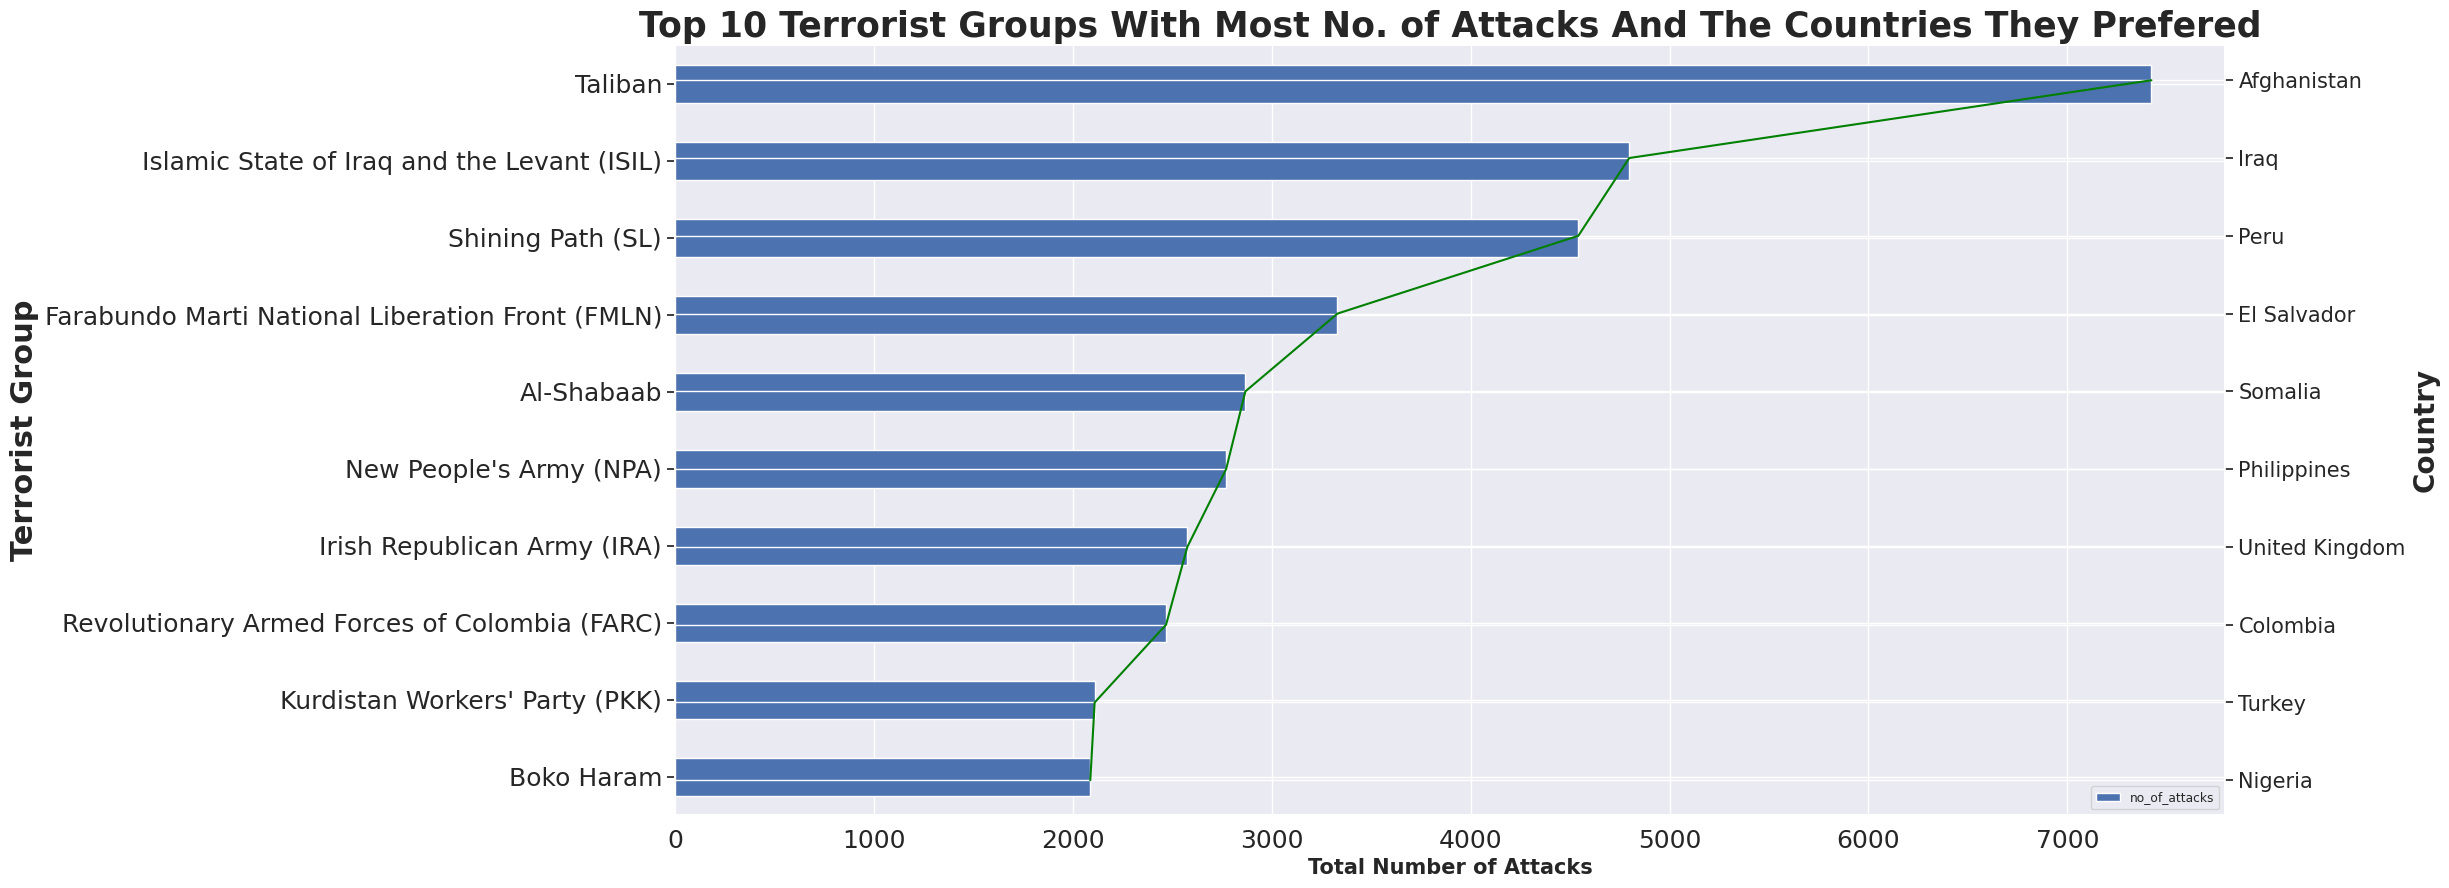

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
mat.rcParams['font.size'] = 20.0
a = top_df.plot(kind='barh', x='organisation',y ='no_of_attacks',fontsize=18)
a.set_xlabel('Total Number of Attacks',fontsize=15,fontweight='bold')
a.set_ylabel('Terrorist Group',fontsize=22,fontweight='bold')
x1=top_df.Country
y=top_df.no_of_attacks
b=a.twinx()
b.plot(y,x1,color="Green")
b.set_xlabel('Country')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.xlabel('Number Of Attacks', fontsize=20)
plt.ylabel('Country', fontsize=20,fontweight='bold')
plt.title('Top 10 Terrorist Groups With Most No. of Attacks And The Countries They Prefered', fontsize=25,fontweight='bold')
plt.show()

**Conclusion: Taliban has the highest number of attacks till date and they mostly operate in Afghanistan.**

**11.No. of attack happened each year in India**

---



In [ ]:
df_India= df[df['Country']=='India']
df_number_of_attacks_by_years =df_India['year'].value_counts().rename_axis('year').reset_index(name='number_of_attacks')
df_number_of_attacks_by_years.head(3)

,year,number_of_attacks
0,2016,1025
1,2017,966
2,2015,884


Text(0.5, 1.0, 'Number of Attacks Each Year in India')

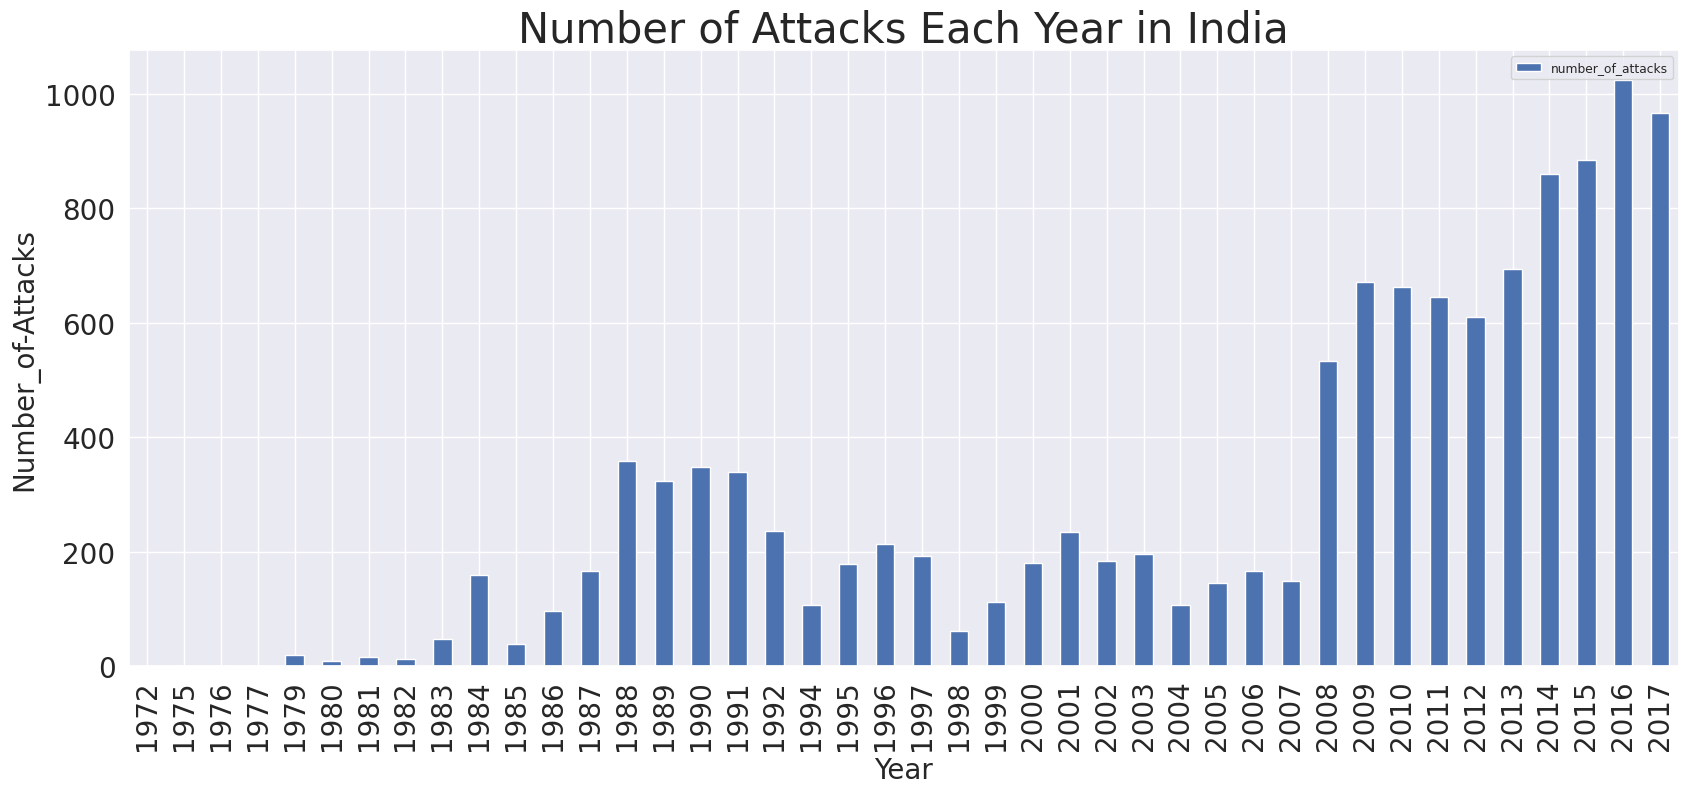

In [ ]:
plt.rcParams['figure.figsize']=(20,8)
df_number_of_attacks_by_years.sort_values('year',ascending= True).plot(kind='bar',x='year',y='number_of_attacks')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number_of-Attacks', fontsize=20)
plt.title('Number of Attacks Each Year in India', fontsize=30)

**Conclusion : Year 2016 has the highest number of attack in India with total number of 1025 attacks in a year.**

**12. No. of citizens killed each year in India**

---



In [ ]:
kills_per_year_india=df_India.groupby('year').agg({'nkilled':'sum'})
kills_per_year_india.reset_index(inplace=True)
kills_per_year_india.tail(5)

,year,nkilled
37,2013,467.0
38,2014,490.0
39,2015,387.0
40,2016,467.0
41,2017,465.0


Text(0.5, 1.0, 'Total Number of Kills Each Year in India from 1970-2017')

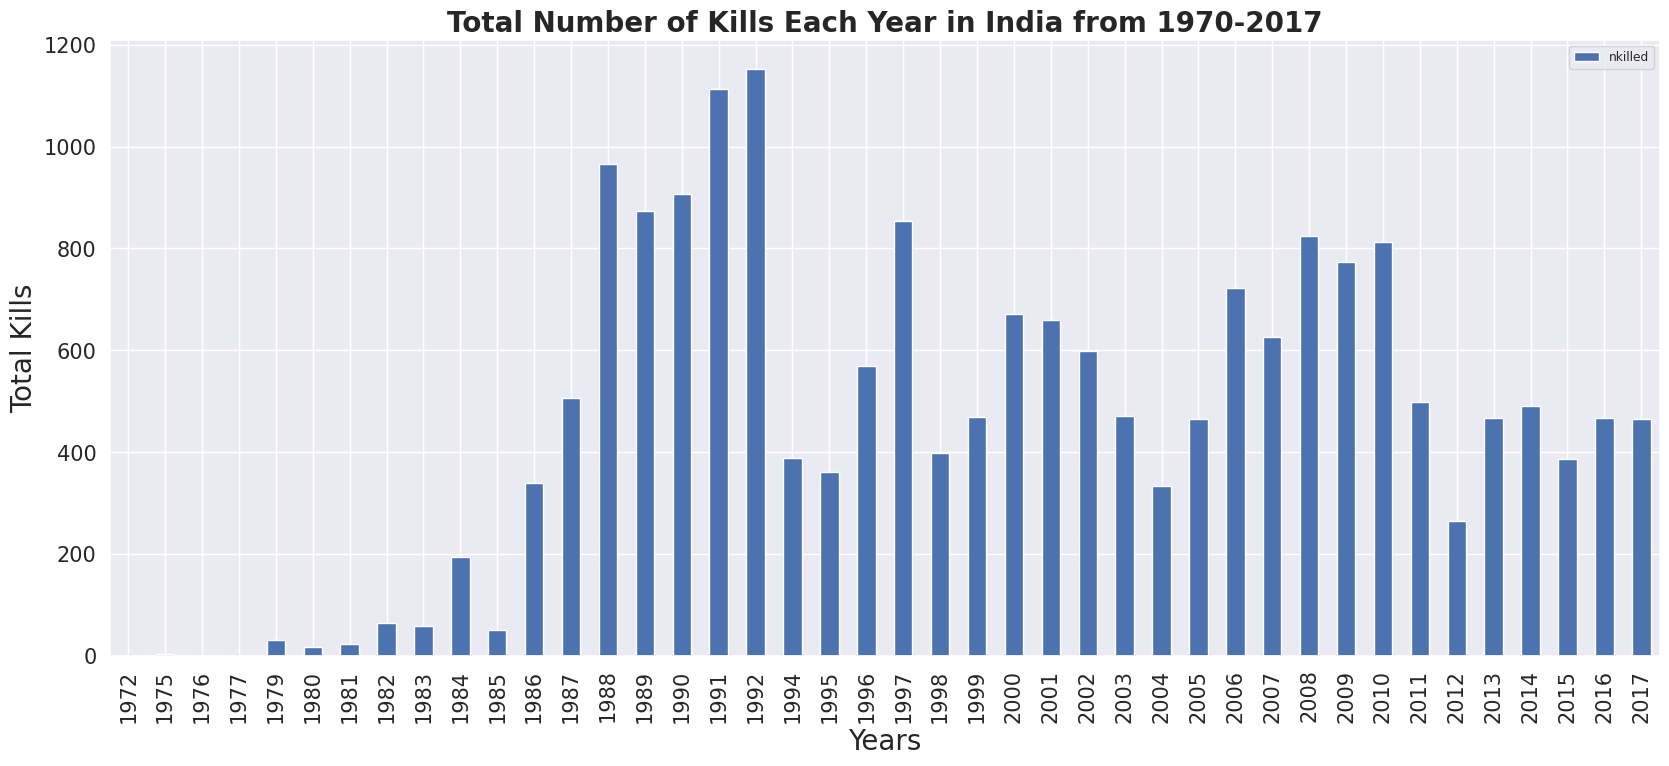

In [ ]:
kills_per_year_india.sort_values('year',ascending= True).plot(kind='bar',x='year',y='nkilled')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt. xlabel('Years', fontsize=20)
plt. ylabel('Total Kills', fontsize=20)
plt.title('Total Number of Kills Each Year in India from 1970-2017', fontsize=20,fontweight='bold')

**Conclusion: 1992 was the year where the most number of citizen were killed with total number is 1152.**

**13.Total Kills vs Type of Attack**

In [ ]:
terrorist_attack_group=pd.DataFrame(df_India, columns=['city','organisation','attacktype','nkilled' ])
terrorist_attack_group.sort_values('nkilled', ascending= False)
index_names = terrorist_attack_group[ terrorist_attack_group['organisation'] == 'Unknown' ].index
terrorist_attack_group.drop(index_names, inplace = True)
index_names = terrorist_attack_group[ terrorist_attack_group['attacktype'] == 'Unknown' ].index
terrorist_attack_group.drop(index_names, inplace = True)
terrorist_attack_group.head(3)

,city,organisation,attacktype,nkilled
1186,New Delhi,Palestinians,Hijacking,0.0
2764,Samastipur,Ananda Marga,Bombing/Explosion,4.0
5327,Bombay,Japanese Red Army (JRA),Hijacking,0.0


In [ ]:
attack_type_killings= terrorist_attack_group.groupby(['attacktype'])['nkilled'].sum().rename_axis('attacktype').reset_index(name='nkilled')
attack_type_killings.sort_values('nkilled', ascending= False)

,attacktype,nkilled
0,Armed Assault,7312.0
2,Bombing/Explosion,4074.0
1,Assassination,1283.0
7,Others,868.0
6,Hostage Taking (Kidnapping),732.0
3,Facility/Infrastructure Attack,130.0
5,Hostage Taking (Barricade Incident),130.0
4,Hijacking,39.0
8,Unarmed Assault,21.0


Text(0.5, 1.0, 'Total Damage (1970-2017) vs Terrorist Attack Type in India')

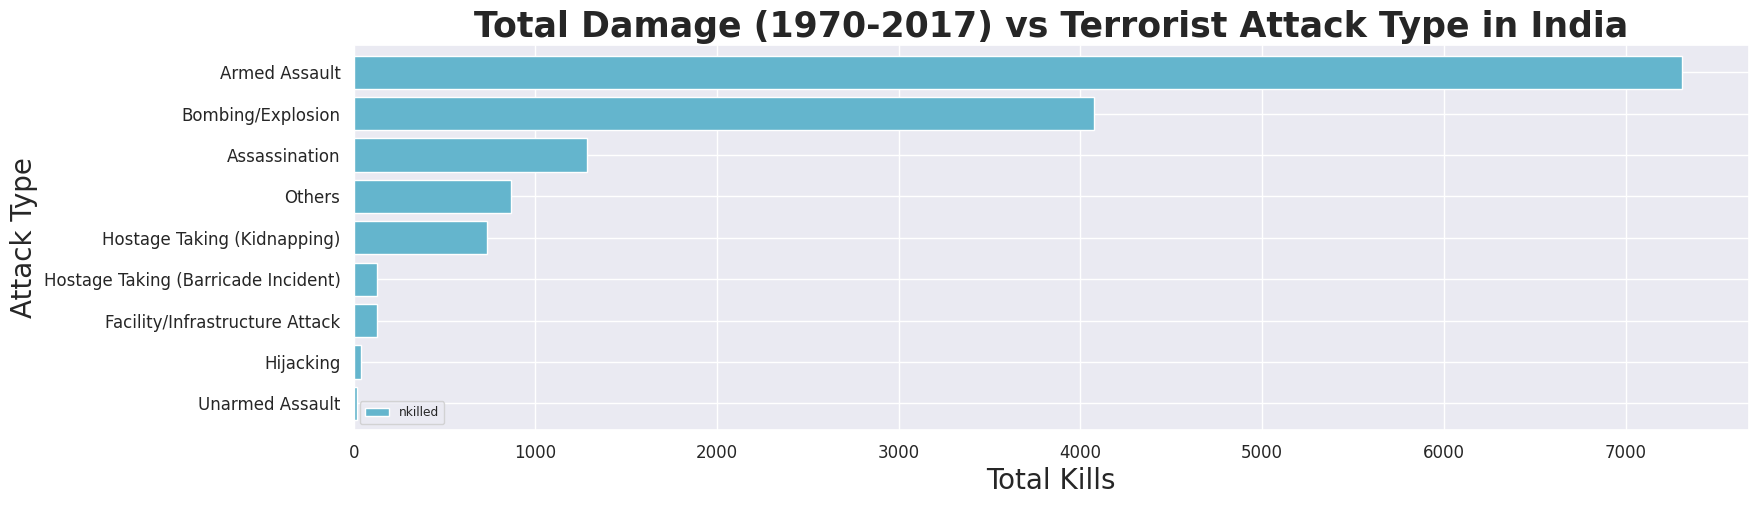

In [ ]:
plt.rcParams["figure.figsize"] = (18, 5)
attack_type_killings.sort_values('nkilled', ascending= True).plot(kind='barh',x='attacktype',color='c',y='nkilled', width=0.8)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt. xlabel('Total Kills', fontsize=20)
plt. ylabel('Attack Type', fontsize=20)
plt.title('Total Damage (1970-2017) vs Terrorist Attack Type in India', fontsize=25,fontweight='bold')

**Conclusion: Armed Assault has done higher amount(nearabout-7300 killings) of Damage**